# Add libraries and cleaning data

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [20]:
data = pd.read_csv('../0. Dataset/train.csv')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [22]:
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

Dataset has 18 columns and 9800 rows.

Column 'Postal Code' has missing value(11 rows = 0,11%).

Finally, drop 3 columns not affect much to analysis. 

In [23]:
# Check duplicated data
data[data.duplicated()].any().sum()

0

In [24]:
# Find missing Postal Code rows 
data[data['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [25]:
# Missing values is postal code for Burlington, Vermont in the United States
# Fill missing data with '05401'
data = data.fillna(value='05401', axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9800 non-null   object
 1   Order ID       9800 non-null   object
 2   Order Date     9800 non-null   object
 3   Ship Date      9800 non-null   object
 4   Ship Mode      9800 non-null   object
 5   Customer ID    9800 non-null   object
 6   Customer Name  9800 non-null   object
 7   Segment        9800 non-null   object
 8   Country        9800 non-null   object
 9   City           9800 non-null   object
 10  State          9800 non-null   object
 11  Postal Code    9800 non-null   object
 12  Region         9800 non-null   object
 13  Product ID     9800 non-null   object
 14  Category       9800 non-null   object
 15  Sub-Category   9800 non-null   object
 16  Product Name   9800 non-null   object
 17  Sales          9800 non-null   object
dtypes: object(18)
memory usage: 

In [26]:
# Export cleaning data to csv
data.to_csv('../2. Cleaning Data/cleaning data.csv')

# Preprocessing and exploring data

In [27]:
data = data.drop(['Row ID', 'Order ID', 'Postal Code'], axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Date     9800 non-null   object
 1   Ship Date      9800 non-null   object
 2   Ship Mode      9800 non-null   object
 3   Customer ID    9800 non-null   object
 4   Customer Name  9800 non-null   object
 5   Segment        9800 non-null   object
 6   Country        9800 non-null   object
 7   City           9800 non-null   object
 8   State          9800 non-null   object
 9   Region         9800 non-null   object
 10  Product ID     9800 non-null   object
 11  Category       9800 non-null   object
 12  Sub-Category   9800 non-null   object
 13  Product Name   9800 non-null   object
 14  Sales          9800 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB


In [28]:
# Change Order Date and Ship Date column into datetime dtype
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst= True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst= True)

In [29]:
# Add a new column is days between Order date and Ship Date
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Days
0,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3
1,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3
2,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,7
9796,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,5
9797,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,5
9798,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,5


[Text(0.5, 1.0, 'Mean of Shipping Days')]

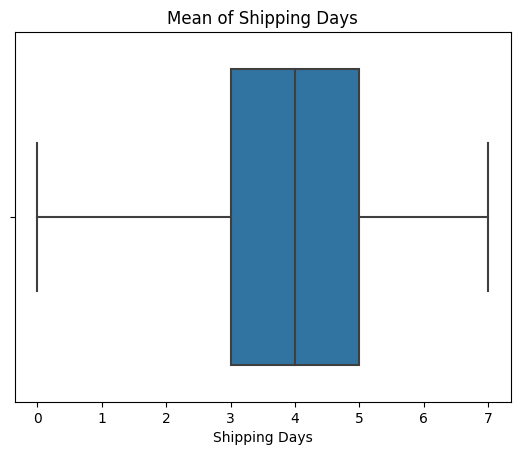

In [30]:
# using boxplot to visualize Shipping Days.

sns.boxplot(data,x = "Shipping Days").set(title= "Mean of Shipping Days")

[Text(0.5, 1.0, 'Shipping Days with Ship Mode')]

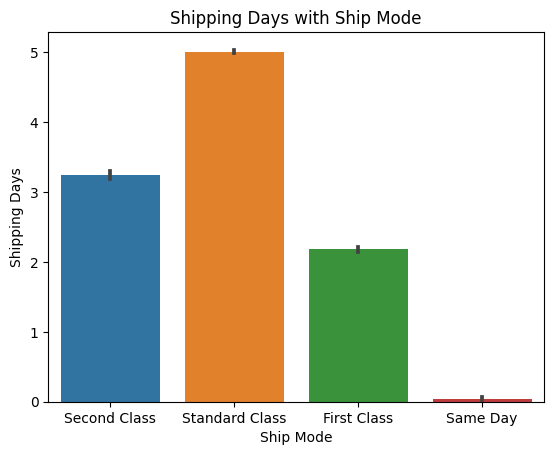

In [31]:
# using catplot to visualize relationship of Shipping Days and Ship Mode

sns.barplot(data, y= "Shipping Days", x= "Ship Mode", estimator='mean').set(title = "Shipping Days with Ship Mode")

[Text(0.5, 1.0, 'Company Profit by Segment')]

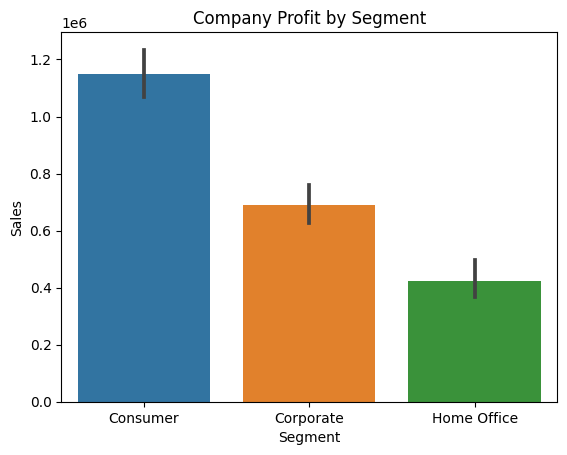

In [32]:
# Visualize column Segment and Sales
sns.barplot(data, x = "Segment", y = "Sales", estimator='sum').set(title = "Company Profit by Segment")

Text(0.5, 1.0, 'Segment ratio')

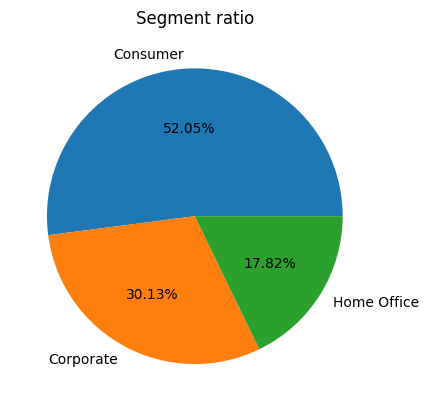

In [33]:
seg_count_list = data['Segment'].value_counts().to_list()
seg_labels = data['Segment'].unique()
plt.pie(x = seg_count_list, labels = seg_labels, autopct= '%1.2f%%')
plt.title("Segment ratio")

[Text(0.5, 1.0, 'Consumer Profit by Region')]

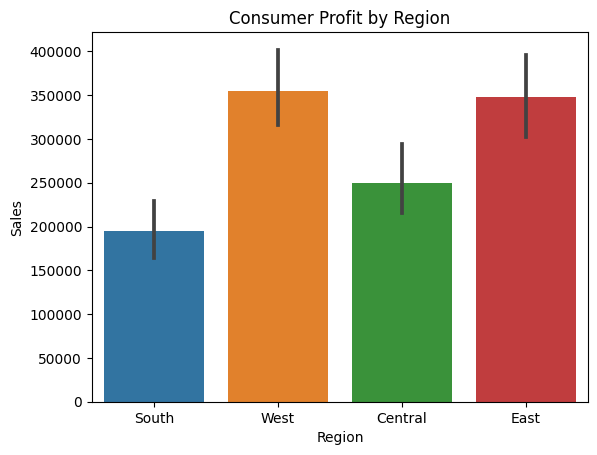

In [34]:
# Consumer segment has highest order and profit
# Visualized profit by Region
Consumer_data = data[data['Segment'] == "Consumer"]
sns.barplot(Consumer_data, x = "Region", y = "Sales", estimator='sum').set(title = "Consumer Profit by Region")

[Text(0.5, 1.0, 'Consumer Profit by Category')]

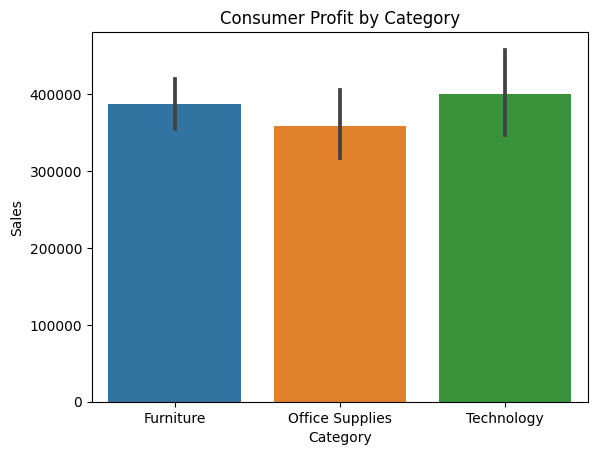

In [35]:
#visualize Consumer profit by Category
sns.barplot(Consumer_data, x = 'Category',  y = 'Sales', estimator='sum').set(title = "Consumer Profit by Category")

[Text(0, 0, 'Bookcases'),
 Text(1, 0, 'Chairs'),
 Text(2, 0, 'Tables'),
 Text(3, 0, 'Storage'),
 Text(4, 0, 'Furnishings'),
 Text(5, 0, 'Art'),
 Text(6, 0, 'Phones'),
 Text(7, 0, 'Binders'),
 Text(8, 0, 'Appliances'),
 Text(9, 0, 'Paper'),
 Text(10, 0, 'Accessories'),
 Text(11, 0, 'Envelopes'),
 Text(12, 0, 'Labels'),
 Text(13, 0, 'Fasteners'),
 Text(14, 0, 'Supplies'),
 Text(15, 0, 'Machines'),
 Text(16, 0, 'Copiers')]

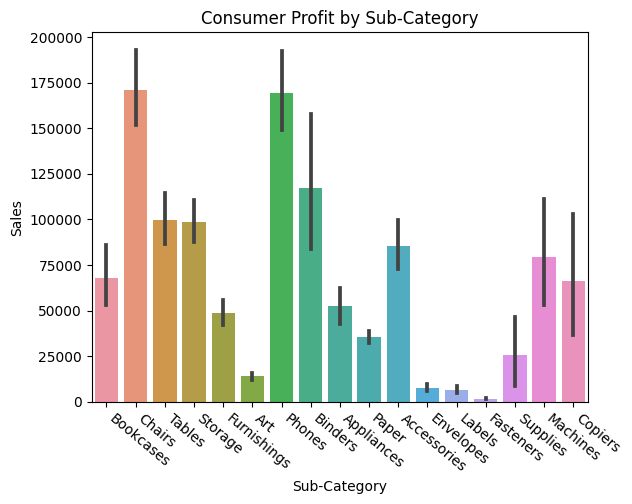

In [70]:
# Visualize Consumer Profit by Sub-Category 
fig = sns.barplot(Consumer_data, x = 'Sub-Category',  y = 'Sales', estimator='sum')
fig.set(title = "Consumer Profit by Sub-Category")
fig.set_xticklabels(fig.get_xticklabels(),rotation = -40, ha = 'left')

In [44]:
# Create a dataframe only have order date and sales
date_consumer = Consumer_data[['Order Date','Sales']]
group_date = date_consumer.groupby('Order Date').sum()
group_date=group_date.reset_index()
group_date

,Order Date,Sales
0,2015-01-03,16.4480
1,2015-01-05,19.5360
2,2015-01-06,19.4400
3,2015-01-07,87.1580
4,2015-01-09,40.5440
...,...,...
1031,2018-12-25,1409.6590
1032,2018-12-26,44.7500
1033,2018-12-28,363.0748
1034,2018-12-29,2604.7140


In [52]:
# Visualize Consumer Profit by Date

fig = px.line(group_date, x = 'Order Date', y = 'Sales')
fig.update_traces(marker_line_width= 2, opacity = 0.8)
fig.update_layout(title_text = "Sale by Date", plot_bgcolor = 'white', font_size = 15, font_color = 'black')
fig.show()

In [62]:
# create a dataframe have sales by month
monthvise = group_date.groupby(group_date['Order Date'].dt.strftime('%B'))['Sales'].sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise = monthvise.reset_index()
monthvise

,Order Date,Sales
0,January,50273.9026
1,February,33446.0400
2,March,89174.7070
3,April,54774.9175
4,May,86406.5024
5,June,81911.2183
6,July,81008.5450
7,August,80591.6703
8,September,180526.1696
9,October,66353.9037


In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x = monthvise['Order Date'], 
                     y = monthvise['Sales'],
                     name = 'Monthly Sales', 
                     marker_color = 'crimson'))
fig.update_layout(barmode = 'group', xaxis_tickangle = 40, title = "Consumer Monthly Profit")